**Before Starting**: First, fill out the below code cell with your first name, last name, and student ID.

**Before Submission**: Make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).


**During Lab Tips**:
1. DO NOT write your written responses in the same markdown cell as the question. If you do this, your written response will be lost!


2. If possible, please try to use your local Jupyter Notebook to complete the lab. Online notebook editors like Collab can edit notebook source code and cause our auto-grader to break, making grading your lab more difficult for us!

**<font color='red'>WARNING: Some TODOs have `todo_check()` functions which will give you a rough estimate of whether you will recieve points or not. <u>These checks are there simply to make sure you are on the right track and they DO NOT determine your final grade for the lab</u>. They are only here to provide you with real-time feedback.</font>**

In [1]:
FIRST_NAME = "Claude"
LAST_NAME = "Kouakou"
STUDENT_ID = "801438848"

#####
# Unsupervised Learning


<br/>

In [2]:
# Extra imports for this lab that are beyond the scope of discussion
import os
import gc
import traceback
import warnings
from pdb import set_trace

# Set this to True if you DO NOT want to run the
# garbage_collect() functions throughout the notebook
turn_off_garbage_collect = False

def garbage_collect(vars_):
    if not turn_off_garbage_collect:
        for v in vars_:
            if v in globals():
                del globals()[v]
        collected = gc.collect()


class TodoCheckFailed(Exception):
    pass

def todo_check(asserts):
    failed_err = "You passed {}/{} and FAILED the following code checks:\n{}"
    failed = ""
    n_failed = 0
    for check, (condi, err) in enumerate(asserts):
        exc_failed = False
        if isinstance(condi, str):
            try:
                passed = eval(condi)
            except Exception:
                exc_failed = True
                n_failed += 1
                failed += f"\nCheck [{check+1}]: Failed to execute check [{check+1}] due to the following error...\n{traceback.format_exc()}"
        elif isinstance(condi, bool):
            passed = condi
        else:
            raise ValueError("asserts must be a list of strings or bools")

        if not exc_failed and not passed:
            n_failed += 1
            failed += f"\nCheck [{check+1}]: Failed\n\tTip: {err}\n"

    if len(failed) != 0:
        passed = len(asserts) - n_failed
        err = failed_err.format(passed, len(asserts), failed)
        raise TodoCheckFailed(err.format(failed))
    print("Your code PASSED the code check!")

# Goal

The goal of this activity is to practice unsupervised learning, clustering and dimensionality reduction where there target labels are not available for training. We will use the Iris dataset. Follow the TODO titles and comments to finish the activity!

# Agenda

* Clustering
  * K-means
  * Mean Shift
  * Agglomerative Clustering
* Dimensionality Reduction
  * PCA
  * LDA
  * tSNE

# Tables of TODO's

1. [TODO 1 (5 points)](#TODO1)
2. [TODO 2 (8 points)](#TODO2)
3. [TODO 3 (9 points)](#TODO3)
4. [TODO 4 (16 points)](#TODO4)
5. [TODO 5 (9 points)](#TODO5)
6. [TODO 6 (12 points)](#TODO6)
7. [TODO 7 (12 points)](#TODO7)
8. [TODO 8 (5 points)](#TODO8)
9. [TODO 9 (5 points)](#TODO9)
10. [TODO 10 (16 points)](#TODO10)
11. [Feedback (3 points)](#feedback)

Well, let us start the lab with importing the common libraries first.

In [3]:
from copy import deepcopy as copy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import seaborn as sns

# Loading Iris data from Scikit-Learn

### TODO 1 (5 points)

Just like previously in the semester, let's load the Iris data via Scikit. The `load_iris()` function will load our Iris data and metadata. Here we only want to extract the data and targets using `iris.data` and `iris.target`. Store them into `X` and `T` respectively.

In [4]:
from sklearn.datasets import load_iris

# TODO 1
iris = load_iris()
X = iris.data
T = iris.target


display(iris)
print("X (data) shape: {}".format(X.shape))
print("T (labels) shape: {}".format(T.shape))

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

X (data) shape: (150, 4)
T (labels) shape: (150,)


Wait. Do we need `T` here? Nope! We are doing "Unsupervised" Learning. So, forget about `T` for a while.

# Visualize Iris data

Here we provide a quick visualization we used prior in the semester. You should be able to  observe the three flower clusters for each of the feature graphs. Recall that the Iris data has 4 features 'Sepal length', 'Sepal width', 'Petal length', and 'Petal width'

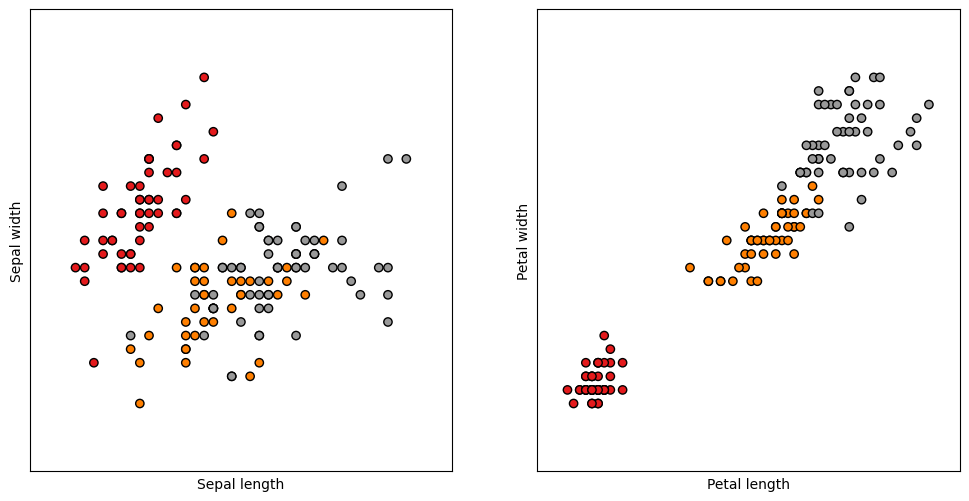

In [95]:
#http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause
# modified by JML

plt.figure(figsize=(12,6))
for i in range(2):
    x_min, x_max = X[:, 2*i].min() - .5, X[:, 2*i].max() + .5
    y_min, y_max = X[:, 2*i+1].min() - .5, X[:, 2*i+1].max() + .5

    plt.subplot(1,2,i+1)
    # Plot the training points
    plt.scatter(X[:, 2*i], X[:, 2*i+1], c=T, cmap=plt.cm.Set1,
                edgecolor='k')
    plt.xlabel('Sepal length' if i==0 else 'Petal length')
    plt.ylabel('Sepal width'  if i==0 else 'Petal width')

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())

# k-Means

OK. Let us cluster the data and see how each algorithm groups the iris data.

<div id="TODO2"></div>

### TODO 2 (8 points)

1. Create an instance using the proper Sklearn class for conducting K-means clustering (make sure to import and use the right class if needed). Store the output into `kmeans`. Pass the arguments that correspond to the following descriptions:
    1. 2 clusters should be used
    3. Use a seed of 0 for the `random_state` argument.
    
    **WARNING: If you don't use this seed, you are likely to fail future TODOs even if your code is correct!**
    
    
2. Train the model on the Iris data `X`.
    1. Hint: Remember we do **NOT** use the labels for training as it is **unsupervised** learning!

3. Print out the predicted targets and cluster centers using `labels_` and `cluster_centers_` respectively.

In [96]:
from sklearn.cluster import KMeans

# TODO 2.1-2.2
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto")
kmeans = kmeans.fit(X)


In [97]:
# TODO 2-3 (predicted targets)
print("Predicted cluster labels:\n", kmeans.labels_)

Predicted cluster labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [98]:
# TODO 2-3 (cluster centers)
print("\nCluster centers:\n", kmeans.cluster_centers_)


Cluster centers:
 [[5.00566038 3.36981132 1.56037736 0.29056604]
 [6.30103093 2.88659794 4.95876289 1.69587629]]


In [99]:
todo_check([
    ("kmeans.cluster_centers_.shape == (2,4)", "kmeans number of n_clusters is incorrect."),
    ("np.all(np.isclose(kmeans.cluster_centers_.flatten()[[0, 2, 6]], np.array([5.005 , 1.56037736 , 4.95876289]), rtol=.01))", "kmeans cluster values are potentially incorrect!")
])

Your code PASSED the code check!


The two centers can be presented neatly with DataFrame as follows.

In [100]:
human_mus  = pd.DataFrame(kmeans.cluster_centers_, columns=iris.feature_names)
human_mus.index = ['cluster {} means'.format(k+1) for k in range(len(human_mus))]
human_mus

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster 1 means,5.005660,3.369811,1.560377,0.290566
cluster 2 means,6.301031,2.886598,4.958763,1.695876


## Visualize Results

Let us visualize the feature means for each cluster, as given below. We can think about the means as x-y coordinates if we pair like features. For example, the 'sepal length' mean could be the x-value and the 'sepal width' mean could be the y-value. Likewise, the 'petal length' mean could be the x-value and the 'petal width' mean could be the y-value. This idea will be useful when plotting the center of the clusters later on!



<div id="TODO3"></div>

### TODO 3 (9 points)

Complete the `plot_iris_cluster` that produce two scatter plots, one for sepal length and width and the other for petal length and width.

1. Plot all the the data points using a scatter plot. Make sure each data point's color corresponds to its target (color code based on targets)!
   1. Hint: you can use column index increment by 2. Refer to the figure code given above.
   1. Hint: Use whatever color map (cmap) you want.
   
   
2. Plot all the the means using a scatter plot. Use the big circle marker 'o' to show the centroids. Use the `mu` and `cluster_labels` (used to color code the clusters) variables to do so.
    1. Hint: You can change marker size to make it bigger if you so choose.


3. Using the `plot_iris_cluster()` function, visualize the clustering results.


4. How do you think the k-means clustering algorithm preformed?

In [101]:
def plot_iris_cluster(X, y, mu, dim=2):
    """
        Plot the Itis data with based on passed labels

        Args:
            X (np.ndarray): Data formatted as a NumPy array
            y (np.ndarray): Vector of labels to plot each cluster.
            mu (float): The center of each cluster
            dim (int): option to plot multidimensional figures (for sepal and petal)
    """

    k = len(np.unique(y)) # mu.shape[0]
    plt.figure(figsize=(12,6))
    for i in range(dim):
        x_min, x_max = X[:, 2*i].min() - .5, X[:, 2*i].max() + .5
        y_min, y_max = X[:, 2*i+1].min() - .5, X[:, 2*i+1].max() + .5

        plt.subplot(1,2,i+1)
        # TODO 3.1: Plot the training points
        plt.scatter(X[:, 2*i], X[:, 2*i+1], c=y, cmap=plt.cm.Set1, edgecolors='k')


        # plot the center
        if mu is not None:
            cluster_labels = range(k)
            # TODO 3.2
            plt.scatter(mu[:, 2*i], mu[:, 2*i+1], 
                        c=cluster_labels, cmap=plt.cm.Set1, 
                        marker='o', s=200, edgecolors='yellow', label="Centroids")


        plt.xlabel('Sepal length' if i==0 else 'Petal length')
        plt.ylabel('Sepal width'  if i==0 else 'Petal width')

        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.xticks(())
        plt.yticks(())

Plot `TODO 3.3` below.

Recall above that we talked about pairing the learned means to get x-y coordinates. If you look closely you can see these pairings or centers of the clusters represented by colored circles.

[[5.00566038 3.36981132 1.56037736 0.29056604]
 [6.30103093 2.88659794 4.95876289 1.69587629]]


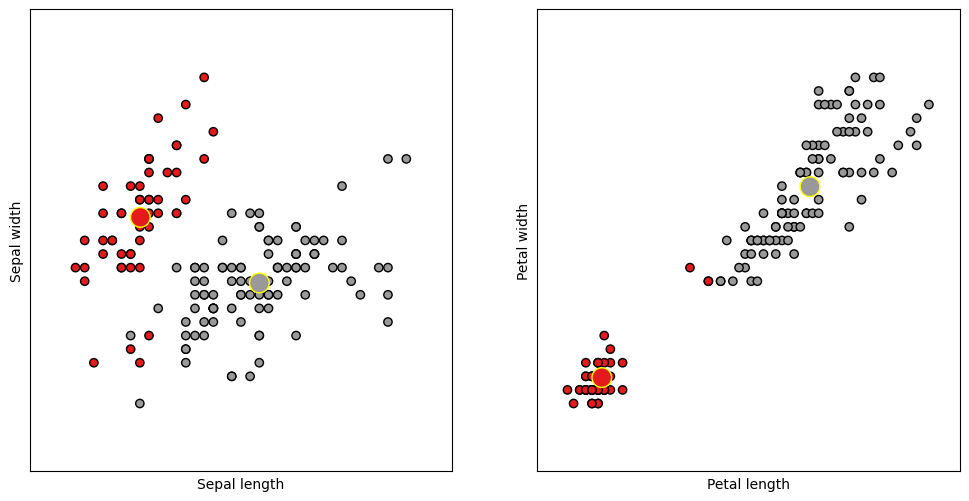

In [102]:
# TODO 3.3
print(kmeans.cluster_centers_)
plot_iris_cluster(X, kmeans.labels_, kmeans.cluster_centers_)


`TODO 3.4` How do you think the k-means clustering algorithm preformed?

**DO NOT WRITE YOUR ANSWER IN THIS CELL!**


`ANSWER:` The-means cluster algorithm seems not to perform well, a few of the instances seem to belong to the wrong clusters.


<div id="TODO4"></div>

### TODO 4-1 (8 points)

Let's try using different amounts of clusters now and then observe what happens to our plots.


1. Retrain the `kmeans` instance but now set the number of cluserts to **5** using the `set_params()` method BEFORE retraining.


2. Retrain the `kmeans` instance but now set the number of cluserts to **3** using the `set_params()` method BEFORE retraining.


3. What do you think about the results of k-Means? What number of clusters do you think works best? Why?

[[5.53214286 2.63571429 3.96071429 1.22857143]
 [5.006      3.428      1.462      0.246     ]
 [7.12272727 3.11363636 6.03181818 2.13181818]
 [6.19655172 2.88275862 5.18275862 1.93448276]
 [6.42380952 2.91904762 4.6047619  1.43809524]]


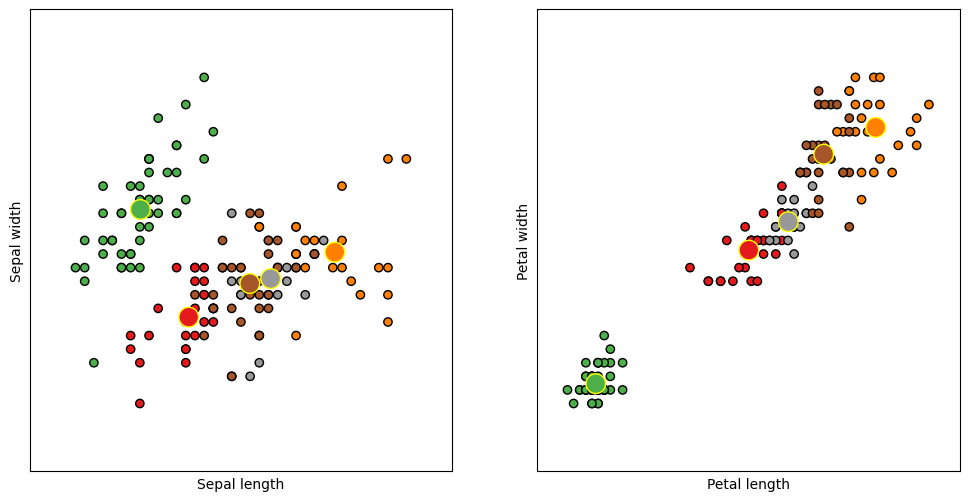

In [103]:
#TODO 4-1.1

kmeans.set_params(n_clusters=5)
kmeans.fit(X)

print(kmeans.cluster_centers_)
plot_iris_cluster(X, kmeans.labels_, kmeans.cluster_centers_)



In [104]:
todo_check([
    ("kmeans.cluster_centers_.shape  == (5,4)", "kmeans number of n_clusters is incorrect."),
    ("np.all(np.isclose(kmeans.cluster_centers_.flatten()[[0,3,7]], np.array([5.53214286, 1.22857143, 0.246]), rtol=.01))", "kmeans cluster values are potentially incorrect!")
])

Your code PASSED the code check!


[[5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]]


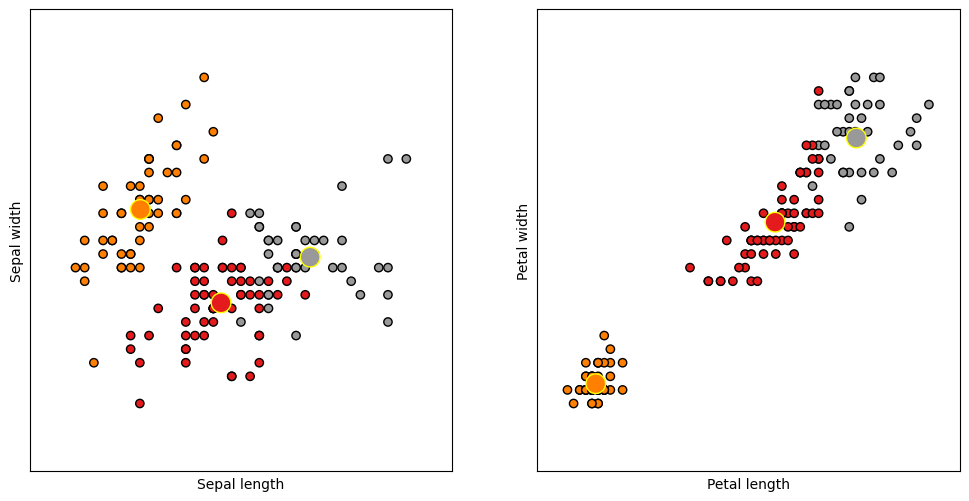

In [105]:
# TODO 4-1.2

kmeans.set_params(n_clusters=3)
kmeans.fit(X)
print(kmeans.cluster_centers_)
plot_iris_cluster(X, kmeans.labels_, kmeans.cluster_centers_)


In [59]:
todo_check([
    ("kmeans.cluster_centers_.shape  == (3,4)", "kmeans number of n_clusters is incorrect."),
    ("np.all(np.isclose(kmeans.cluster_centers_.flatten()[[0,3,7]], np.array([5.9016129 , 1.43387097, 0.246     ]), rtol=.01))", "kmeans cluster values are potentially incorrect!")
])

Your code PASSED the code check!


`TODO 4-1.3` What do you think about the results of k-Means? What number of clusters do you think works best? Why?


**DO NOT WRITE YOUR ANSWER IN THIS CELL!**


`ANSWER:` the 3 Clusters K-Means looks better than the 5 clusters and even the 2 clusters because in reality, the data has 3 clusters/classes when you visualize the data.  


### TODO 4-2 (3 points)

As we know the number of classes in the data is three, let's see how our original labels and predicted clustered labels match up.


1. Plot by using the `plot_iris_cluster()` function. Instead of using the predicted clustered labels `labels_`, use the true labels `T`.
    1. Hint: You must also pass the learned centers and the Iris data `X.`  

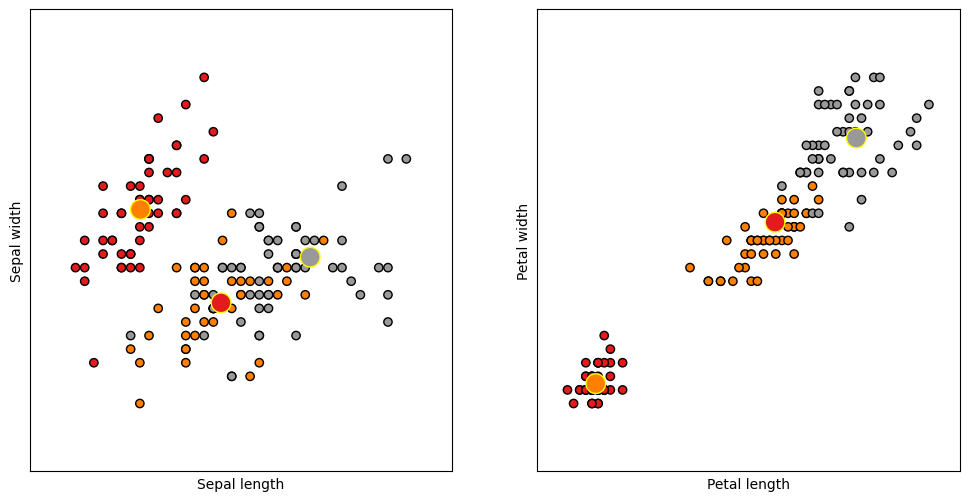

In [63]:
#TODO 4-2.1
plot_iris_cluster(X, T, kmeans.cluster_centers_)

Take second to observe where the centers of each of the three clusters are? Are they close to their true label clusterings?

Below we compute the actual accuracy and further visualize our mislabeled data.

In [64]:
acc = np.sum(kmeans.labels_==T)/X.shape[0]
print("k-means accuracy: {:.5f}".format(acc))

k-means accuracy: 0.24000


Hold on. The accuracy is not good as we observed in the figure. Why? Let us see what happened.

### TODO 4-3 (5 points)

1. Plot the targets `T` *with* the predicted `kmeans` targets `kmeans.labels_`. The targets should be plotted with the big red circle marker ('o') while the predicted targets should be plotted with a blue cross marker ('x').


2. Explain what you have observed from the figure? Do you have any clue what could be happening here?

Plot TODO 4-3.1 below.

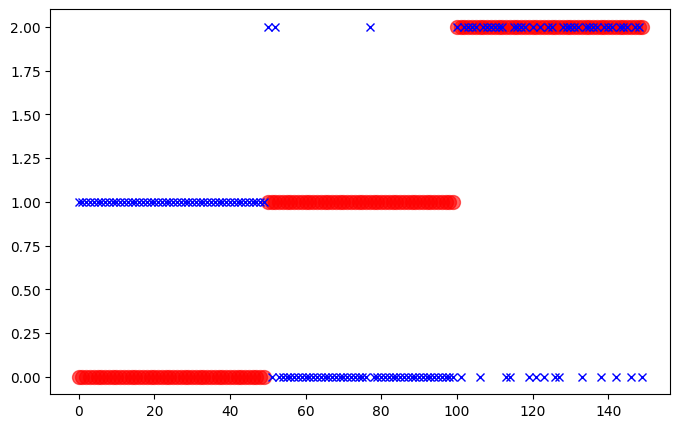

In [75]:
# TODO 4-3.1
# TODO 4-3.1
plt.figure(figsize=(8,5))

plt.plot(T, 'ro', markersize=10, alpha=0.6)
plt.plot(kmeans.labels_, 'bx')


`TODO 4-3.2` Explain what you have observed from the above figure? Do you have any clue what could be happening here?


**DO NOT WRITE YOUR ANSWER IN THIS CELL!**

`ANSWER` I see that for label 2 the T and k-means labels overlay only a few instances are not. However, for the 0 and 1, the plots are separated (not overlaying). That could be that we may have different label numbers. 


In [60]:
garbage_collect(['acc', 'kmeans'])

<div id="TODO5"></div>

### TODO 5-1 (4 points)

1. Create AND train an instance of Sklearn's `MeanShift` class. Store the class instance into `ms`.

2. Plot the clustering results using the `plot_iris_cluster()` function.

# Mean Shift

Mean Shift does not need to predetermine the number of clusters. Let us see how MS clusters the same data.

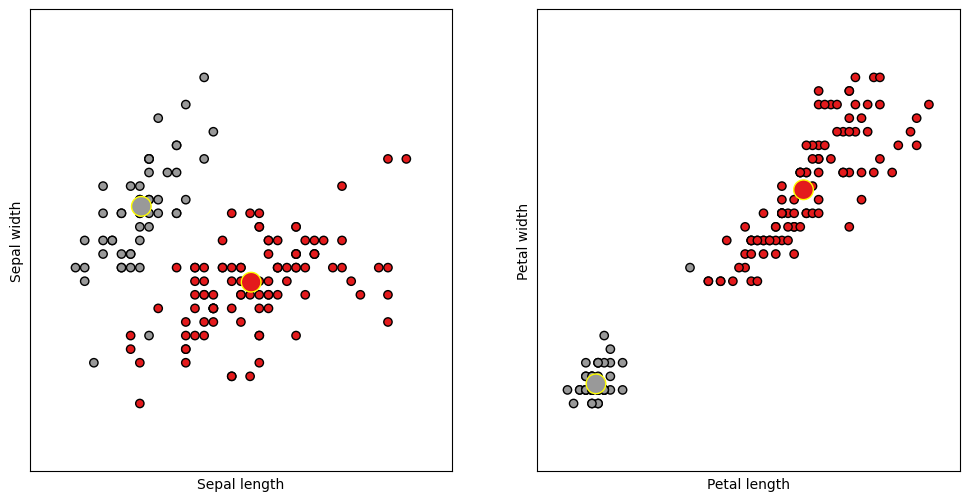

In [108]:
from sklearn.cluster import MeanShift

# TODO 5-1.1
ms = MeanShift()
ms.fit(X)

# TODO 5-1.2
plot_iris_cluster(X, ms.labels_ , ms.cluster_centers_ )



In [109]:
todo_check([
    ("ms.cluster_centers_.shape == (2, 4)", "ms has the wrong number of clusters."),
    ("np.all(np.isclose(ms.cluster_centers_.flatten()[[0, 3, 7]], np.array([6.21142857, 1.67285714, 0.24489796]),rtol=.1))", "ms has incorrect cluster values.")
])

Your code PASSED the code check!


### TODO 5-2 (5 points)

1. Retrain `ms` using ONLY the last two columns of data in `X`.


2. Retrain `ms` using ONLY the first two columns of data `X`.


3. Do you observe any difference between the choice of features when using the different combinations of columns

[[4.58113208 1.50754717]
 [1.462      0.246     ]
 [5.30222222 1.94888889]]


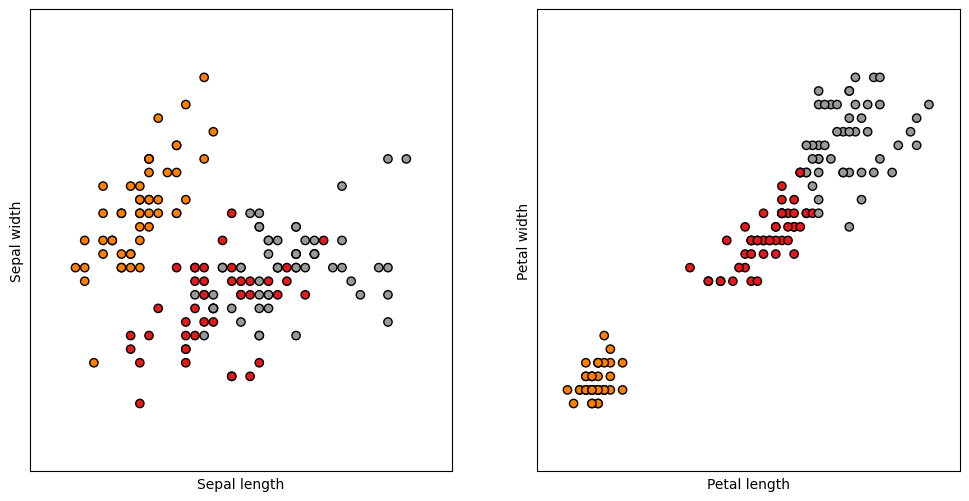

In [110]:
# TODO 5-2.1
X_petal = X[:, 2:]  

# Train MeanShift on petal-based features
ms.fit(X_petal)
print(ms.cluster_centers_)
plot_iris_cluster(X, ms.labels_, None)

In [111]:
todo_check([
    ("ms.cluster_centers_.shape == (3, 2)", "ms has the wrong number of clusters."),
    ("np.all(np.isclose(ms.cluster_centers_.flatten()[[0, 3]], np.array([4.58113208, 0.246     ]),rtol=.1))", "ms has incorrect cluster values.")
])

Your code PASSED the code check!


[[6.22       2.892     ]
 [5.41142857 3.03285714]]


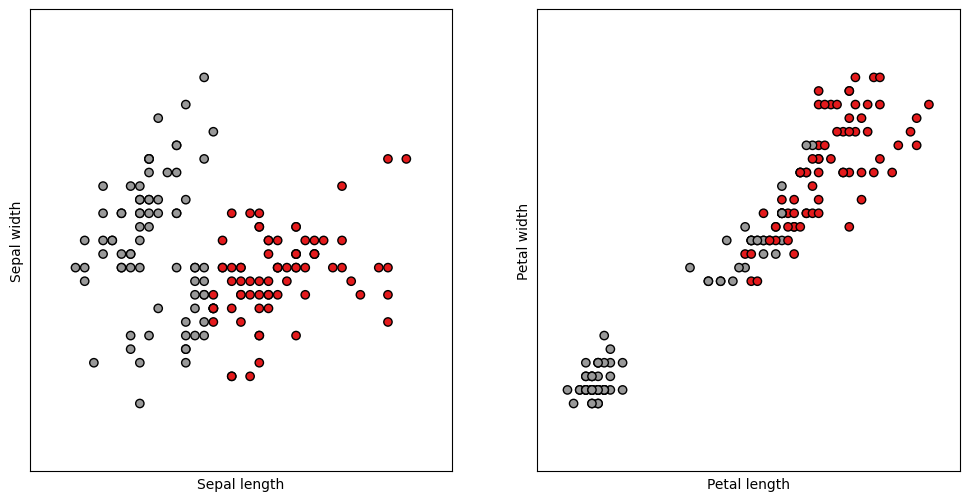

In [112]:
# TODO 5-2.2
# Use only the first two columns (Sepal Length & Sepal Width)
X_sepal = X[:, :2]  

# Train MeanShift on sepal-based features
ms.fit(X_sepal)
print(ms.cluster_centers_)
plot_iris_cluster(X, ms.labels_, None)

In [113]:
todo_check([
    ("ms.cluster_centers_.shape == (2, 2)", "ms has the wrong number of clusters."),
    ("np.all(np.isclose(ms.cluster_centers_.flatten()[[0, 3]], np.array([6.22      , 3.03285714]),rtol=.1))", "ms has incorrect cluster values.")
])

Your code PASSED the code check!


`TODO 5-2.3` Do you observe any difference between the choice of features when using the different combinations of columns?

**DO NOT WRITE YOUR ANSWER IN THIS CELL!**

`ANSWER` Using only the last 2 features we can see a better clustering of the three in petals, while the sepals are not clustered. using only the first 2 features we have a better clustering of the sepal and the petals are not.


## Agglomerative Clustering

Now, let us see how we cluster the data in a holistic way. Again, we do not need to know how many clusters there are.


<div id="TODO6"></div>

### TODO 6-1 (4 points)

1. Create AND train an instance of Sklearn's `AgglomerativeClustering` class. Store the output into `agg`. Pass the arguments that correspond to the following descriptions. Store the class instance into `agg`.
    1. Set the distance threshold to 1.
    2. Set the number of clusters to `None`


2. Plot the clustering results using `plot_iris_cluster()` function.
    1. Hint: Pass `None` for  the `mu` argument if you are getting errors with the plotting function.

Number of Clusters:  25


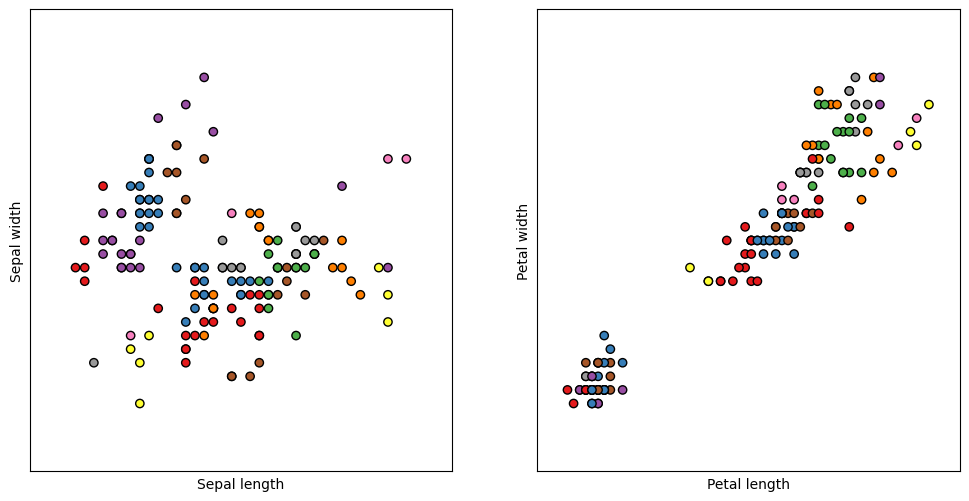

In [114]:
from sklearn.cluster import AgglomerativeClustering

# TODO 6-1.1
agg = AgglomerativeClustering(distance_threshold=1.0, n_clusters=None, compute_full_tree=True)
agg.fit(X)

# TODO 6-1.2
plot_iris_cluster(X, agg.labels_, mu=None)


# print the number of clusters
print("Number of Clusters: ", agg.n_clusters_)

In [115]:
todo_check([
    ("agg.n_clusters_ == 25", "agg number of clusters is potentially incorrect"),
    ("np.all(agg.labels_[[0, 5, -10 , -1]] == np.array([ 4, 16, 23, 24]))", "agg predicted labels are potentially incorrect"),
])

Your code PASSED the code check!


As expected, we have all the individual data samples are their own clusters, so the number of clusters is equal to the number of data samples because of 0 distance threshold. Now, let us create the dendrogram to see how the threshold affects the clusters. Here is the code from scikit-learn to draw a dendrogram.

In [116]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    y_vals = linkage_matrix[:, 2]
    thresholds = np.percentile(y_vals, [20, 40, 60, 80, 100])
    print(thresholds)
    
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

### TODO 6-2 (2 points)

1. Call the `plot_dendrogram()` function. Pass the follwing keyword arguments.
    1. Pass `truncate_mode='level'`
    1. Pass `p=3`

[ 0.2         0.31622777  0.46690415  0.82357838 32.447607  ]


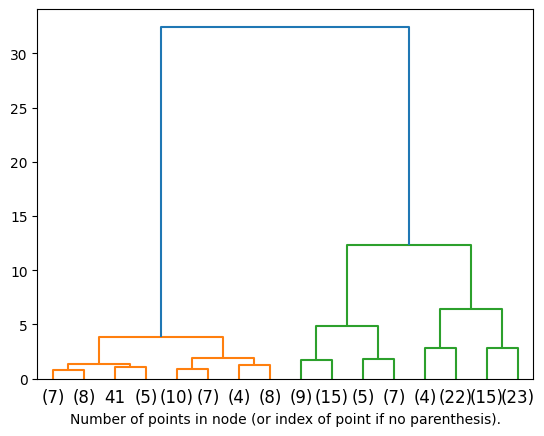

In [117]:
# TODO 6-2.1


plot_dendrogram(agg, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### TODO 6-3 (6 points)

Now we want to see how the actual clustering works when you change the threshold.

1. Looking at the dendrogram, determine 5 different threshold that you'd liked to experiment with (exclude zero). Then, create a list `thresholds` containing the 5 different threshold values.


2. Retrain `agg` with the current distance threshold `thres`. Use the `set_params()` method for `agg` BEFORE training to set the current threshold.


3. Plot the clustering results using `plot_iris_cluster()` function.
    1. Hint: Pass `None` for  the `mu` argument.

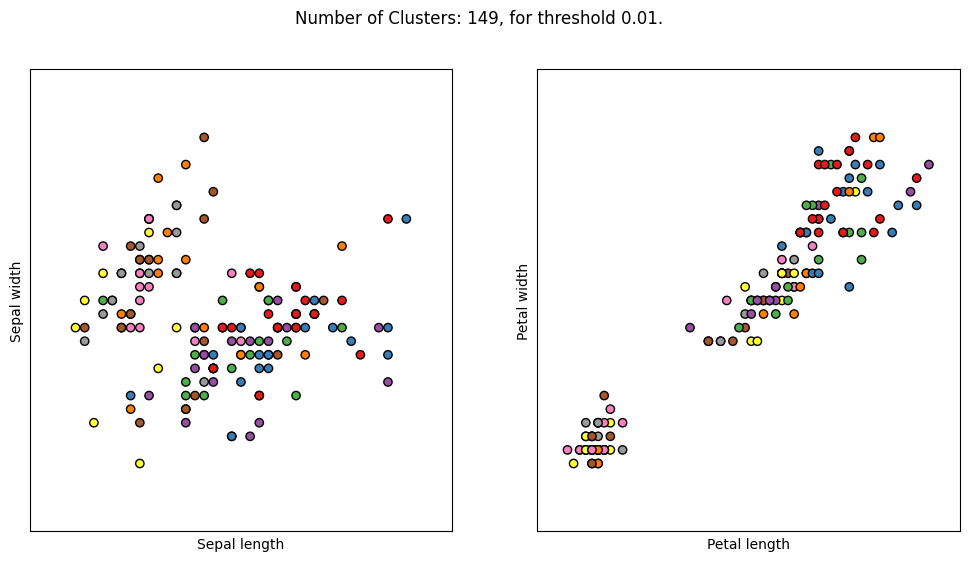

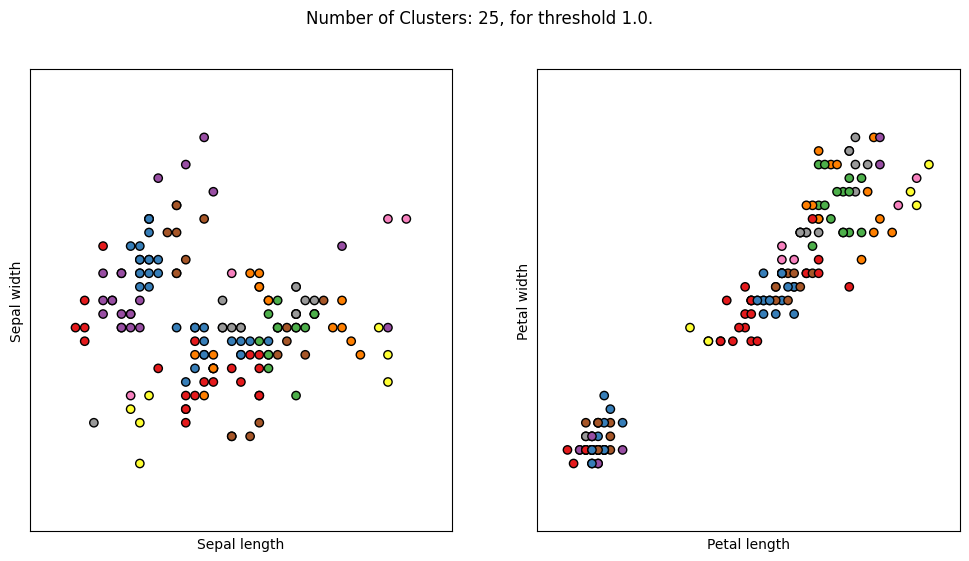

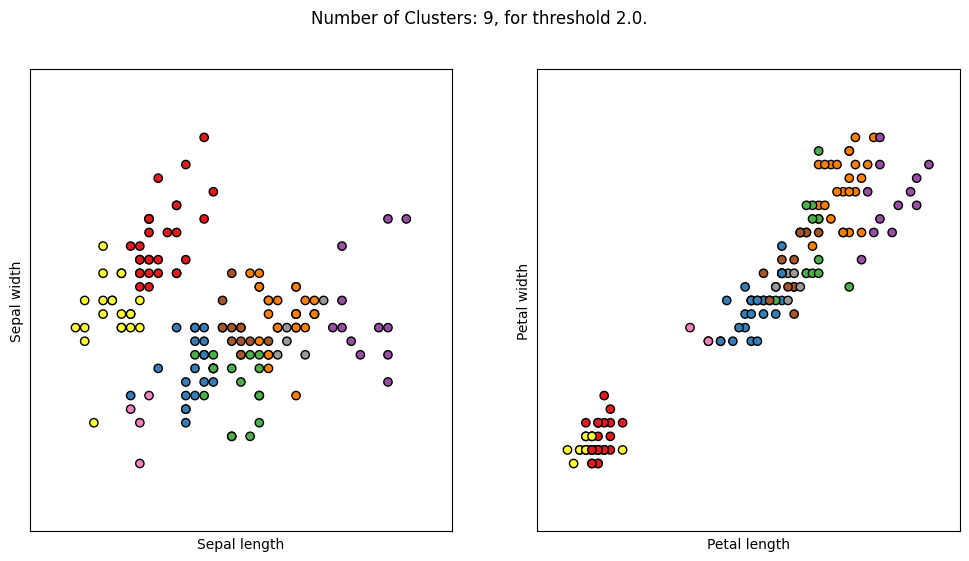

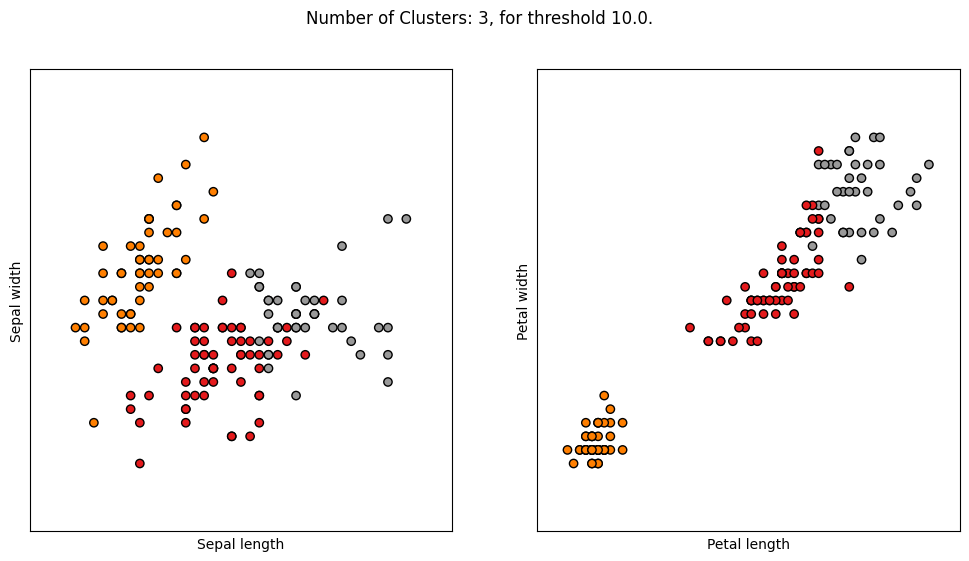

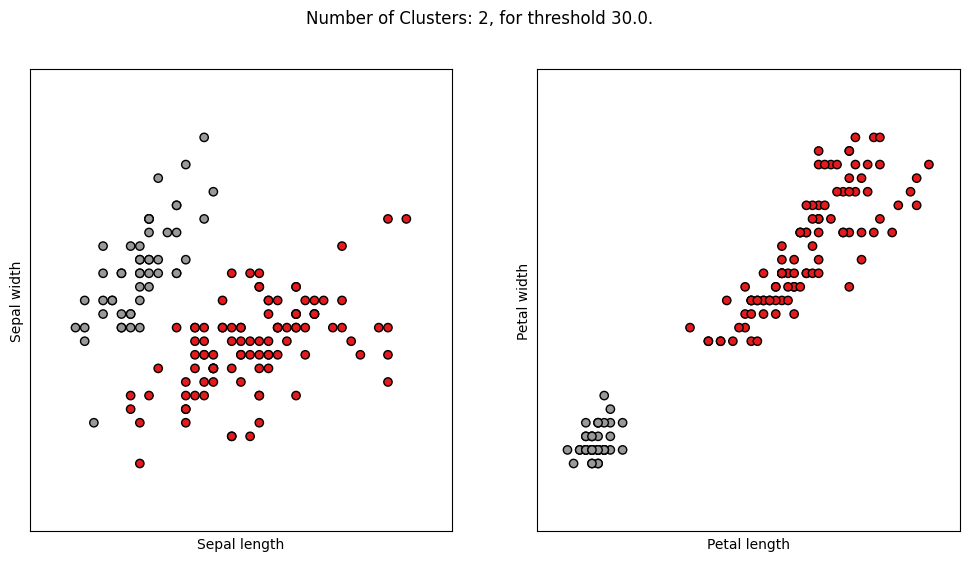

In [118]:
# TODO 6-3.1
thresholds = [0.01, 1.0, 2.0, 10.0, 30.0]  # Choose based on dendrogram

for thres in thresholds:
    # TODO 6-3.2 - 6-3.3

    # Update the threshold using set_params() before fitting
    agg.set_params(distance_threshold=thres, n_clusters=None)
    agg.fit(X)  # Train on the Iris dataset

    plot_iris_cluster(X, agg.labels_ , mu=None)


    plt.suptitle("Number of Clusters: {}, for threshold {}.".format(agg.n_clusters_, thres))

# PCA

Pairing our features to form x-y coordinates and the then plotting with two figures makes sense in this case, but not typically. Especially when it is much higher diemensional, it will be much harder to visualize it. Not only for visualization, it won't be easy for machine learning models to develop a good model with a large number of features (it will easily overfit!). To get around this issue, we can reduce the dimensions or features of our data to only consist of the most important dimensions.

Let's practice reducing dimensionality from 4 dimensions (features) to two dimensions so we can have a single 2D plot and only two features to consider while clustering.

<div id="TODO7"></div>

### TODO 7-1 (7 points)

General note: We continue to use the Iris data, so the training data is still `X`.

1. Import `Pipeline`, `StandardScaler`, and `PCA`.


2. Create AND train the `Pipeline` class instance. The `Pipeline` flow should be specified such that `StandardScaler` is applied first and then `PCA` is performed. Store the output into `pca`. Pass the following arguments as described below.
    1. For PCA, use 4 components .
    2. For PCA, use a random state of 0.


3. Using `p`, access the following.
    1. Access the `explained_variance_ratio_` and store the output into `explained_ratio`.
    1. Access the `singular_values_` and store the output into `singular_values`.


In [119]:
# TODO 7-1.1 - 7-1.2
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components = 4, random_state = 0) )
])

pca = pipeline.fit_transform(X)

p = pipeline.named_steps['pca']

# TODO 7-1.3

explained_ratio = p.explained_variance_ratio_
singular_values = p.singular_values_


print(f"explained_ratio:\n\t{explained_ratio}")
print(f"singular_values:\n\t{singular_values}")

explained_ratio:
	[0.72962445 0.22850762 0.03668922 0.00517871]
singular_values:
	[20.92306556 11.7091661   4.69185798  1.76273239]


In [120]:
todo_check([
    ("np.all(np.isclose(explained_ratio, [0.72962445, 0.22850762, 0.03668922, 0.00517871], rtol=.1))", "explained_ratio values are potentially incorrect"),
    ("np.all(np.isclose(singular_values, [20.92306556, 11.7091661,   4.69185798,  1.76273239],rtol=.1))", "singular_values values are potentially incorrect"),
])

Your code PASSED the code check!


Let us see both printouts. We can see the first two components are dominating and the latter two are minimally affecting for explanation/variation of the principal components. Then, we can reduce the dimensionality to two major components.


### TODO 7-2 (5 points)

1. Create a `Pipeline` class instance we reduced components. The `Pipeline` flows through `StandardScaler` and `PCA`. Store the output into `pca`. Pass the following arguments as described below.
    1. For PCA, use 2 components .
    2. For PCA, use a random state of 0.


2. Using the `fit_transform()` method to train and transform the data `X`. Store the output into `X_pca`.


3. Plot the transformed `X_pca` which is 2  dimensional. Thus, plot the 1st column on the x-axis and the 2nd column on the y-axis.
    1. Hint: Color code the data points based on their true class `T`. You can use any color map you want.

In [121]:
# TODO 7-2.1 - 7-2.2
pca = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components = 2, random_state = 0) )
])

X_pca = pca.fit_transform(X)



In [122]:
todo_check([
    ("np.all(np.isclose(X_pca[[0, -1]].flatten(), np.array([-2.26470281,  0.4800266 ,  0.96065603, -0.02433167]), rtol=.1))", "")
])

Your code PASSED the code check!


Plot `TODO 7-2.3` below.

Text(0, 0.5, 'Second Principal Component')

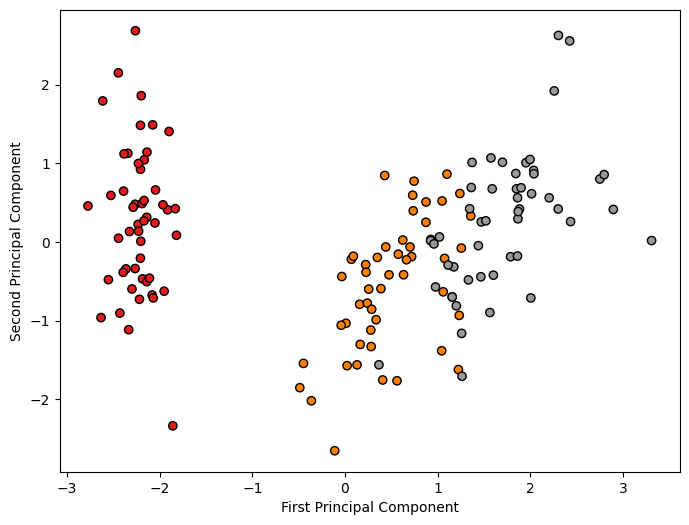

In [123]:
# TODO 7-2.3
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=T, cmap=plt.cm.Set1, edgecolors='k')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# LDA

Now, let us see how we can use the LDA to reduce the dimensionality and see how it differs from PCA.



<div id="TODO8"></div>

### TODO 8 (5 points)

1. Create a Sklearn `LinearDiscriminantAnalysis` class instance (import if needed). Store the output into `lda`. Pass the following arguments as described below.
    1. Use 2 components .
  

2. Train `lda` using the Iris data AND targets.


3. Transform the Iris data `X` using the `transform()` method. Store the output into `X_lda`.


4. Plot the transformed `X_lda` which is 2 dimensional. Thus, plot the 1st column on the x-axis and the 2nd column on the y-axis.
    1. Hint: Color code the data points based on their true class `T`. You can use any color map you want.

In [124]:
#  TODO 8.1 - 8.3
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X, T)

X_lda = lda.transform(X)

X_lda

array([[ 8.06179978e+00, -3.00420621e-01],
       [ 7.12868772e+00,  7.86660426e-01],
       [ 7.48982797e+00,  2.65384488e-01],
       [ 6.81320057e+00,  6.70631068e-01],
       [ 8.13230933e+00, -5.14462530e-01],
       [ 7.70194674e+00, -1.46172097e+00],
       [ 7.21261762e+00, -3.55836209e-01],
       [ 7.60529355e+00,  1.16338380e-02],
       [ 6.56055159e+00,  1.01516362e+00],
       [ 7.34305989e+00,  9.47319209e-01],
       [ 8.39738652e+00, -6.47363392e-01],
       [ 7.21929685e+00,  1.09646389e-01],
       [ 7.32679599e+00,  1.07298943e+00],
       [ 7.57247066e+00,  8.05464137e-01],
       [ 9.84984300e+00, -1.58593698e+00],
       [ 9.15823890e+00, -2.73759647e+00],
       [ 8.58243141e+00, -1.83448945e+00],
       [ 7.78075375e+00, -5.84339407e-01],
       [ 8.07835876e+00, -9.68580703e-01],
       [ 8.02097451e+00, -1.14050366e+00],
       [ 7.49680227e+00,  1.88377220e-01],
       [ 7.58648117e+00, -1.20797032e+00],
       [ 8.68104293e+00, -8.77590154e-01],
       [ 6.

In [125]:
todo_check([
    ("np.all(np.isclose(X_lda[[0, -1]].flatten(), np.array([8.06179978, -0.30042062, -4.68315426, -0.33203381]), rtol=.1))", "")
])

Your code PASSED the code check!


Plot `TODO 8.4` below.

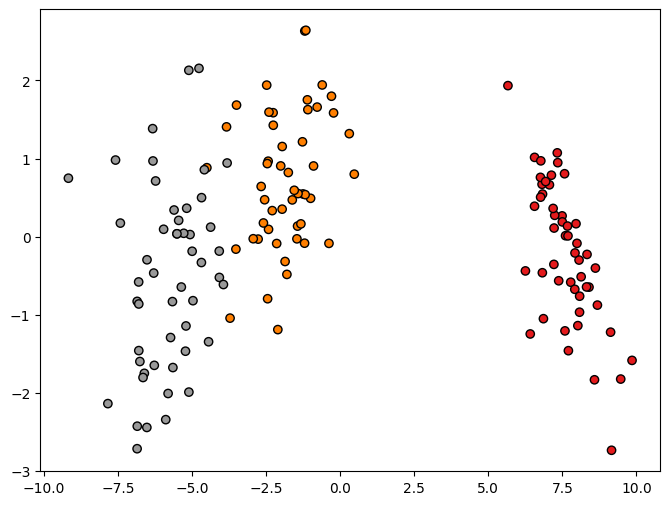

In [126]:
# TODO 8.4
# Scatter plot of transformed LDA data

plt.figure(figsize=(8, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=T, cmap=plt.cm.Set1, edgecolors='k')


# t-SNE

Let us try one of the most popular manifold learning, t-SNE and how it differently maps the data into lower dimensional space.


<div id="TODO9"></div>

### TODO 9 (5 points)

General hints: You may see some warnings thrown by Sklearn, this is okay!

1. Create a Sklearn `TSNE` class instance (import if needed). Store the output into `tsne`. Pass the following arguments as described below.
    1. Use 2 components .
    2. Use a random state of 0.
    

2. Use the `fit_transform()` method to train and transform the data `X`. Store the output into `X_tsne`.


3. Plot the transformed `X_tsne` which is 2 dimensional. Thus, plot the 1st column on the x-axis and the 2nd column on the y-axis.
    1. Hint: Color code the data points based on their true class `T`. You can use any color map you want.

In [127]:
# TODO 9.1 - 9.2
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

X_tsne = tsne.fit_transform(X)



Plot `TODO 9.3` below.

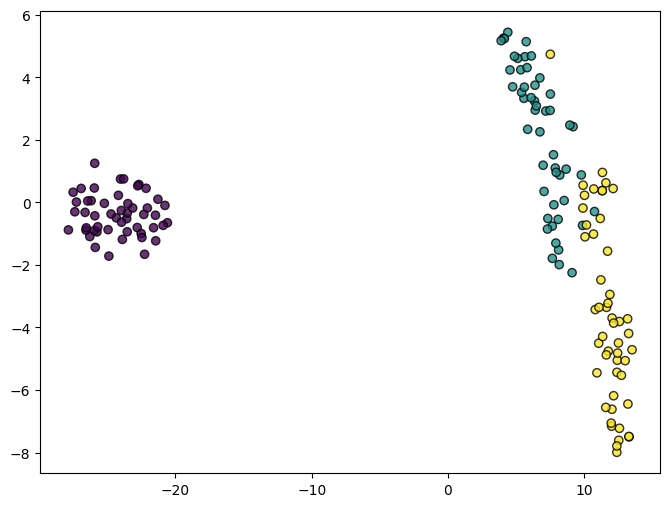

In [128]:
# TODO 9.3

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=T, cmap="viridis", edgecolors='k', alpha=0.8)


In [129]:
garbage_collect(['tsne', 'lda', 'agg', 'pca', 'thresholds', 'p', 'explained_ratio', 'singular_values'])

# Evaluation

Let us quickly evaluate the clustering performance with some of clustering evaluation metrics.

<div id="TODO15"></div>


### TODO 10 (16 points)

1. Import the following clustering metrics: `rand_score`, `homogeneity_score`, `completeness_score`, and `silhouette_score`.


2. Create a `KMeans` instance for conducting K-means clustering. Store the output into `kmeans`. Pass the arguments that correspond to the following descriptions:
    1. 3 clusters should be used
    3. Use a seed of 0 for the `random_state` argument. **WARNING: If you don't use this seed, you are likely to fail future TODOs even if your code is correct!**

**Train using each of the transformed datasets `X_pca`, `X_lda`, and `X_tsne`**

3. Train the `kmeans` model using the PCA data, compute the clustering metrics  and then convert the `scores` list into a Pandas `DataFrame` by following the instructions below,.
    1. Compute metrics.
        1. Compute the `rand_score` using the targets and k-means predicted targets. Store the output into `r_score`.
        2. Compute the `homogeneity_score` using the targets and k-means predicted targets. Store the output into `h_score`.
        3. Compute the `completeness_score` using the targets and k-means predicted targets. Store the output into `c_score`.
        4. Compute the `silhouette_score` using the transformed data and k-means predicted targets. Store the output into `s_score`.
    2. Create a `DataFrame`.
        1. Create a `DataFrame` using `scores` and `df_columns` as the column names. Store the output into `res`.
        


4. Train the `kmeans` model using the LDA data, compute the clustering metrics  and then convert the `scores` list into a DataFrame by following the instructions below.
    1. Refer to instructions from `TODO 10.3`. Make sure to use the LDA  transformed data.



5. Train the `kmeans` model using the TSNE data, compute the clustering metrics  and then convert the `scores` list into a DataFrame by following the instructions below.
    1. Refer to instructions from `TODO 10.3`. Make sure to use the TSNE  transformed data.


6. How does the transformed data affect the clustering performance?

In [130]:
# TODO 10.1 - 10.2
from sklearn.metrics import rand_score, homogeneity_score, completeness_score, silhouette_score
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)

def evaluate_clustering(X_transformed, T, method_name):
    """
    Train KMeans clustering and compute evaluation metrics.

    Args:
        X_transformed: Transformed dataset (PCA, LDA, or t-SNE)
        T: True labels
        method_name: Name of the transformation method
    
    Returns:
        Pandas DataFrame with clustering scores
    """
    # Train KMeans on transformed data
  
    kmeans.fit(X_transformed)
    
    # Get predicted labels
    y_pred = kmeans.labels_

    # Compute clustering metrics
    r_score = rand_score(T, y_pred)
    h_score = homogeneity_score(T, y_pred)
    c_score = completeness_score(T, y_pred)
    s_score = silhouette_score(X_transformed, y_pred)
    
    return (r_score, h_score, c_score, s_score)


In [137]:
######################### PCA results
# TODO 10.3-1
# Column names for res DataFrames
df_columns = ["Rand Index", "Homogeneity", "Completeness", "Silhouette"]
# PCA-transformed data (X_pca)
pca = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components = 2, random_state = 0) )
])
X_pca = pca.fit_transform(X)

r_score, h_score, c_score, s_score = evaluate_clustering(X_pca, T, "PCA")

scores = [[r_score, h_score, c_score, s_score]]


# TODO 10.3-2
res = pd.DataFrame(scores, columns=df_columns)

res

,Rand Index,Homogeneity,Completeness,Silhouette
0,0.832215,0.659127,0.659848,0.509168


In [138]:
todo_check([
    ("isinstance(res, pd.DataFrame)", "res is not a DataFrame"),
    ("np.all(list(res.columns) == df_columns)", "res has incorrect column names"),
    ("np.all(np.isclose(res.values,np.array([[0.83221477, 0.6591265 , 0.65984768, 0.50916833]]),rtol=.1))", "res potentially has incorrect values")

])

Your code PASSED the code check!


In [139]:
######################### LDA results
# TODO 10.4-1
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X, T)
X_lda = lda.transform(X)

r_score, h_score, c_score, s_score = evaluate_clustering(X_lda, T, "LDA")


scores = [[r_score, h_score, c_score, s_score]]

# TODO 10.4-2
res = pd.DataFrame(scores, columns=df_columns)

res

,Rand Index,Homogeneity,Completeness,Silhouette
0,0.97396,0.919176,0.919287,0.655816


In [140]:
todo_check([
    ("isinstance(res, pd.DataFrame)", "res is not a DataFrame"),
    ("np.all(list(res.columns) == df_columns)", "res has incorrect column names"),
    ("np.all(np.isclose(res.values,np.array([[0.97395973, 0.91917583, 0.9192874 , 0.65581606]]),rtol=.1))", "res potentially has incorrect values")
])

Your code PASSED the code check!


In [141]:
######################### t-SNE results
# TODO 10.5
# t-SNE-transformed data (X_tsne)
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X)

r_score, h_score, c_score, s_score = evaluate_clustering(X_tsne, T, "t-SNE")

scores = [[r_score, h_score, c_score, s_score]]

# TODO 10.5-2
res = pd.DataFrame(scores, columns=df_columns)


res

,Rand Index,Homogeneity,Completeness,Silhouette
0,0.885906,0.769596,0.785902,0.685048


In [142]:
todo_check([
    ("isinstance(res, pd.DataFrame)", "res is not a DataFrame"),
    ("np.all(list(res.columns) == df_columns)", "res has incorrect column names"),
    ("np.all(np.isclose(res.values,np.array([[0.91946309, 0.80631995, 0.80789042, 0.65968615]]),rtol=.1))", "res potentially has incorrect values")
])

Your code PASSED the code check!


`TODO 10.6`  How does the transformed data affect the clustering performance?

**DO NOT WRITE YOUR ANSWER IN THIS CELL!**

`ANSWER:` The transformed data yields better clustering, I can see a high value of silhouette scores as well as completeness, homogeneity, and Rand Index,  which are a measure of clustering quality.


<div id="feedback"></div>

# Feedback (3 point)

Did you enjoy the lab?

Please take time to answer the following feedback qustions to help us further improve these labs! Your feedback is crucial to making these labs more useful!
    


* How do you rate the overall experience in this lab? (5 likert scale. i.e., 1 - poor ... 5 - amazing)  
Why do you think so? What was most/least useful?



`ANSWER` I rate this lab 5 - amazing, I am exited about what I am learnig.  K-Mean, dimensionality reduction are very important concepts to understand in ML.

* What did you find difficult about the lab? Were there any TODOs that were unclear? If so, what specfically did not make sense about it?



`ANSWER` the dendrogram was a little confusing to me, I did not know how to select the thresholds based on the dendrogram.

* Which concepts, if any, within the lab do you feel could use more explanation?

`ANSWER` I think the dendrogram needs a little more explanation, I did not understand its usage. 